<a href="https://colab.research.google.com/github/jeff10joy/random-state-DA/blob/main/random_state_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import 
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb 
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import  metrics
from scipy.stats.stats import pearsonr   
 

In [ ]:
!pip install xgboost

## **Problem Statement - Variation of scikit's train_test_split random state value with dataset size(normally distributed), for producing better model performance.**
*Initial experiments to be run on normally distributed datasets with different number of rows, and then in future scope inference to be expanded over to other types of distributions as well*

The python code we used to generate normally distributed dataset is in data_generator.py

We are synthetical generating normally distributed dataset with four attributes.
The varying size of data has the same covariance, mean, standard deviation for the attributes

Size of dataset used 100, 500, 1000, 10000, 100000


Model metrics that are being monitored with different random state values, MSE, cross validaton score for the benchmark models we are testing on(XGB, SVR, LinearRegression).



Experimenting with the first dataset mentioned

In [ ]:
df = pd.read_csv('10000rows_dataset.csv')

df.describe()

,col_1,col_2,col_3,col_4
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.979470,10.011015,9.983307,50.002062
std,2.251300,2.484487,1.684554,2.085061
min,2.176383,0.630339,1.974140,42.184389
25%,8.418206,8.313150,8.856404,48.595930
50%,9.992063,10.008505,9.992326,49.987002
75%,11.504574,11.659396,11.112512,51.407844
max,17.869147,20.123843,16.564481,57.242934


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


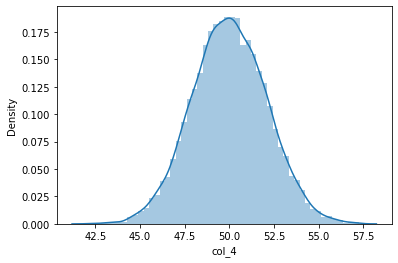

In [ ]:
#checking for normal distribution
sns.distplot(df['col_4']);

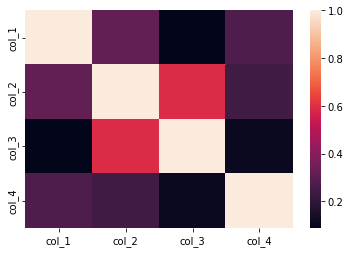

In [ ]:
#CHECKING FOR CORRELATION BETWEEN THE ATTRIBUTES
corr = df.corr().abs()
sns.heatmap(corr)


In [ ]:
#CHECKING FOR NAN VALUES AND IMPUTING THEM
print(df.shape)

df.isnull().sum()


(100000, 4)


col_1    0
col_2    0
col_3    0
col_4    0
dtype: int64

In [ ]:

def train_models(df):
    model_linear = LinearRegression()
    model_xgb = xgb.XGBRegressor(n_estimators=5000)
    model_svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
    random_states = [i for i in range(10,201,10)]
    #random_states.extend([500, 1000, 5000])
    errors_linear, errors_xgb, errors_svr  = [], [], []
    scores_linear, scores_xgb, scores_svr = [], [], []
    for rs in random_states:

          X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=0.2, random_state=rs, shuffle = True)
          model_linear.fit(X_train, Y_train)
          Y_linear = model_linear.predict(X_test)
          scores_linear.append(cross_val_score(
          model_linear, df.iloc[:,0:-1], df.iloc[:,-1], cv=5))
          
          model_xgb.fit(X_train, Y_train)
          Y_xgb = model_xgb.predict(X_test)
          scores_xgb.append(cross_val_score(
          model_xgb, df.iloc[:,0:-1], df.iloc[:,-1], cv=5))


          model_svr.fit(X_train, Y_train)
          Y_svr = model_svr.predict(X_test)
          scores_svr.append(cross_val_score(
          model_svr, df.iloc[:,0:-1], df.iloc[:,-1], cv=5))
          
          errors_linear.append(mean_squared_error(Y_test, Y_linear))
          errors_xgb.append(mean_squared_error(Y_test, Y_xgb))
          errors_svr.append(mean_squared_error(Y_test, Y_svr))
    return errors_linear, errors_xgb, errors_svr, scores_linear, scores_xgb, scores_svr

[21:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:


def infer(df, rows):
      random_states = [i for i in range(10,201,10)]
      
      errors_linear, errors_xgb, errors_svr, scores_linear, scores_xgb, scores_svr =train_models(df)
      print("For dataset of rows", rows)
      f, axs = plt.subplots(2,2,figsize=(15,15))
      axs[0,0].plot(random_states, errors_svr[:20])
      axs[0,0].set_xlabel('random_state values')
      axs[0,0].set_ylabel('SVR errors')
      
      # displaying the title
      axs[0,0].set_title('SVR - random_state vs mse error')

      axs[0,1].plot(random_states, errors_linear[:20])
      axs[0,1].set_xlabel('random_state values')
      axs[0,1].set_ylabel('Linear regression errors')
      
      # displaying the title
      axs[0,1].set_title('Linear - random_state vs mse error')

      axs[1,0].plot(random_states, errors_xgb[:20])
      axs[1,0].set_xlabel('random_state values')
      axs[1,0].set_ylabel('XGboost errors')
      
      # displaying the title
      axs[1,0].set_title('XGBoost - random_state vs mse error')
      f.savefig('plots_100')
      print("saving plots")
      plt.show()
   
      print(pearsonr(errors_linear,errors_svr))
      print("Cross validation score for different values of random_state for Linear regression - ", scores_linear)
      print("Cross validation score for different values of random_state for SVR - ", scores_svr)
      print("Cross validation score for different values of random_state for XGBoost - ", scores_xgb)

For dataset of rows 100
[21:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now d

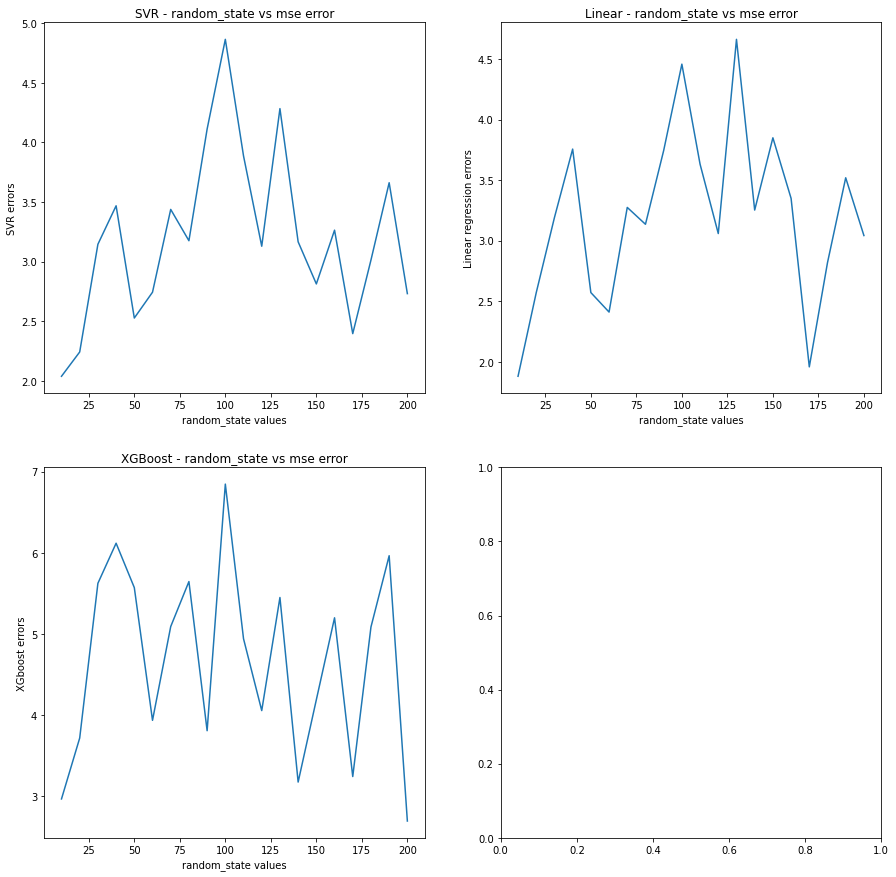

NameError: ignored

In [ ]:
df = pd.read_csv('100rows_dataset.csv')
infer(df, 100)

In [ ]:
infer(df, 500)

20

In [ ]:
infer(df, 1000)

Cross validation score for different values of random_state for Linear regression -  [array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.09073692, -0.00422753, -0.02107974,  0.24808016]), array([ 0.47192896,  0.090

In [ ]:
infer(df, 10000)

In [ ]:
infer(df, 100000)